# Python in Jupyter
### Fremont bicycle data demo
Antero Kangas 3.6.2018

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 12:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


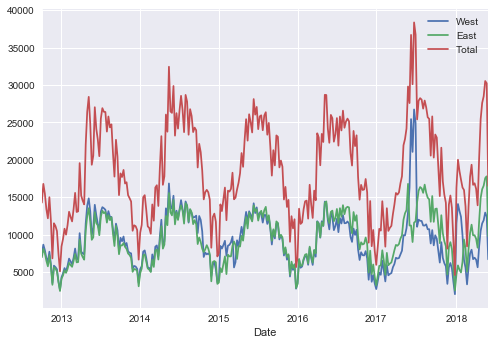

In [4]:
data.resample("W").sum().plot()

(0, 1136322.1499999999)

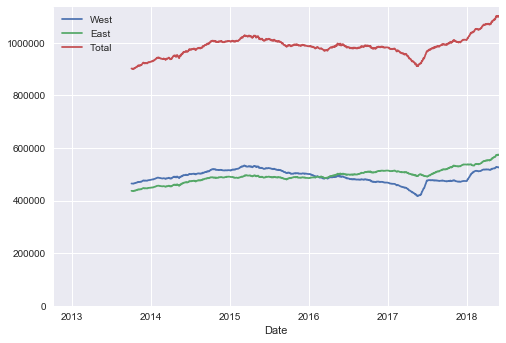

In [5]:
ax = data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

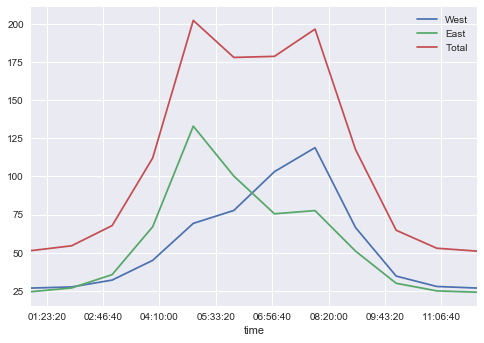

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :7]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09
01:00:00,50.0,64.5,60.0,96.0,122.5,50.0,43.0
02:00:00,65.0,64.0,66.0,106.0,122.0,63.0,56.0
03:00:00,84.5,75.0,84.0,107.0,118.5,86.0,71.0
04:00:00,161.0,141.5,159.5,94.0,114.0,128.5,126.5
05:00:00,307.0,266.5,229.5,92.5,100.0,313.5,314.0


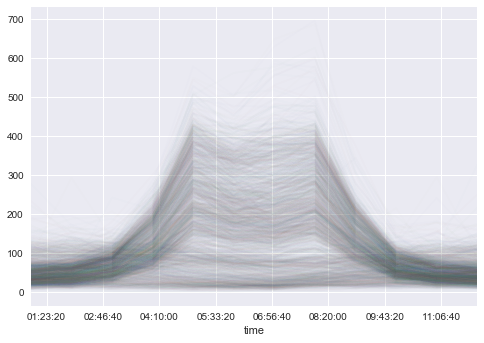

In [8]:
pivoted.plot(legend=False, alpha=0.01)